In [1]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
# Load The Data Set 
coke_data=pd.read_csv("C:\\Users\\Admin\\Desktop\\unified\\proj 3\\Coca-Cola_stock_history.csv")

In [3]:
# Show First Five Rows
coke_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [4]:
# Check Info
coke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB


In [5]:
# Force Conversion and handle errors gracefully
coke_data["Date"]=pd.to_datetime(coke_data["Date"], errors="coerce")
# Drop rows where conversion failed( not a time
coke_data.dropna(subset=["Date"], inplace= True)
# Now sort and reset index
coke_data.sort_values("Date", inplace=True)
coke_data.reset_index(drop=True, inplace=True)


In [6]:
coke_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [7]:
# Checking for mising values
coke_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
# Moving average
coke_data["MA_20"]=coke_data["Close"].rolling(window=20).mean()
coke_data["MA_50"]=coke_data["Close"].rolling(window=50).mean()

# Daily return
coke_data["Daily_Return"]=coke_data["Close"].pct_change()

# Volatility (rolling std dev)
coke_data["Volatility"]=coke_data["Daily_Return"].rolling(window=20).std()

# Drop NA rows create due to rolling
coke_data.dropna(inplace=True)

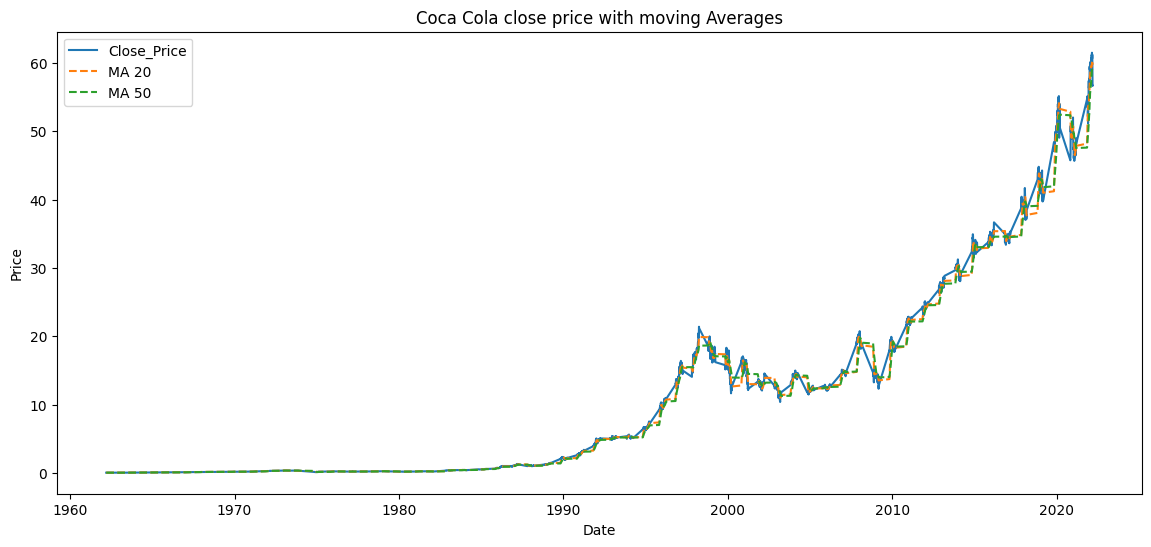

In [9]:
# line plot of close with moving Averages
plt.figure(figsize=(14,6))
plt.plot(coke_data["Date"],coke_data["Close"],label="Close_Price")
plt.plot(coke_data["Date"],coke_data["MA_20"],label="MA 20",linestyle="--")
plt.plot(coke_data["Date"],coke_data["MA_50"],label="MA 50",linestyle="--")
plt.title("Coca Cola close price with moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

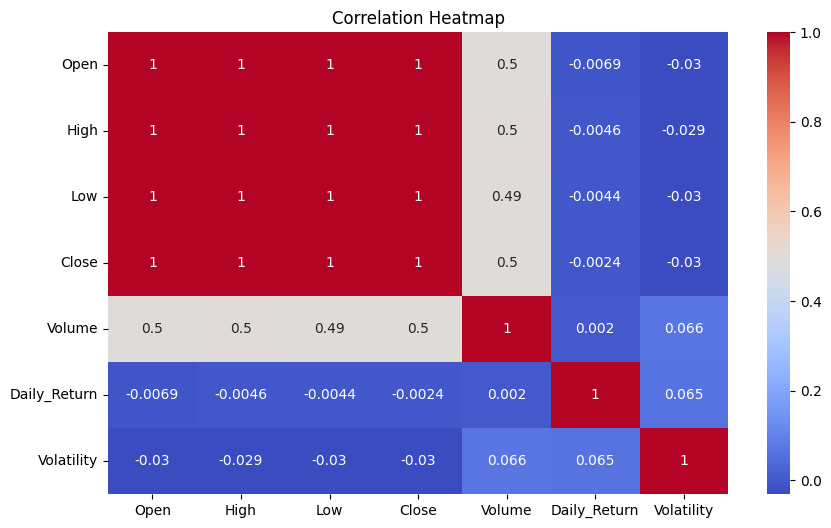

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(coke_data[["Open","High","Low","Close","Volume","Daily_Return","Volatility"]].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

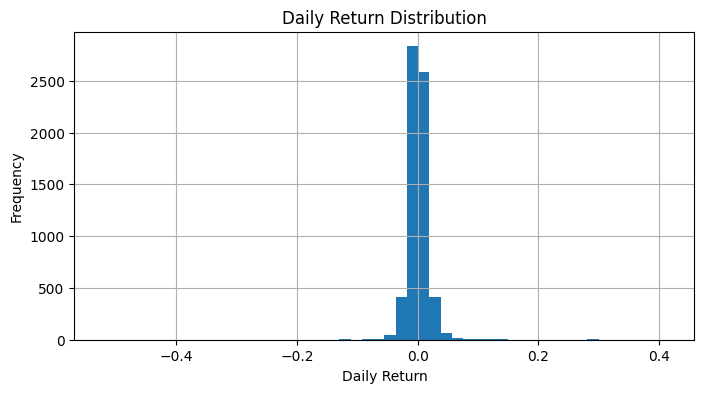

In [11]:
# Daily return histogram
coke_data["Daily_Return"].hist(bins=50,figsize=(8,4))
plt.title("Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()                               
                               

In [12]:
print(len(coke_data))

6422


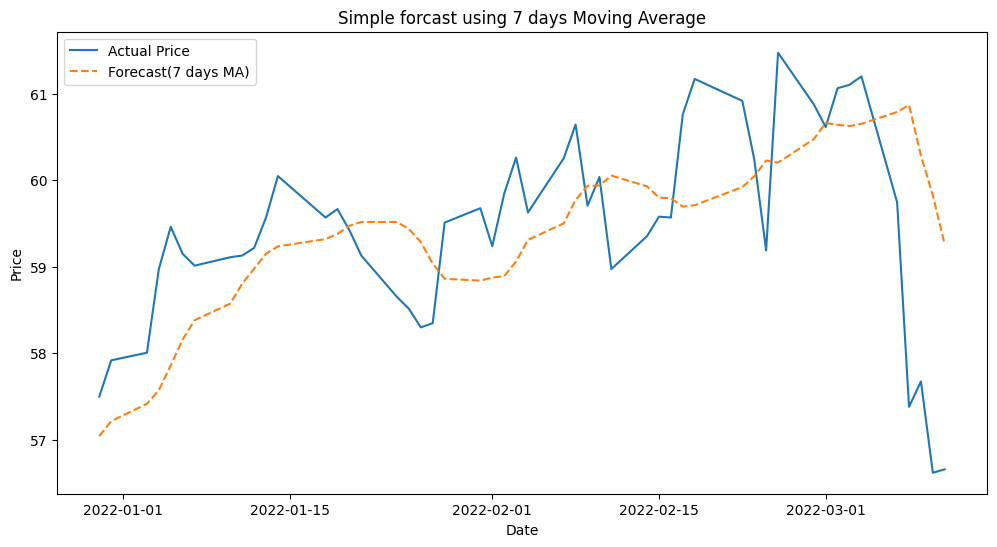

In [13]:
# Forcast using last 7 days average
coke_data["Forecast_7"]=coke_data["Close"].rolling(window=7).mean().shift(1)

# Compare last 50 actual vs forcast
plt.figure(figsize=(12,6))
plt.plot(coke_data["Date"].tail(50),coke_data["Close"].tail(50),label="Actual Price")
plt.plot(coke_data["Date"].tail(50),coke_data["Forecast_7"].tail(50),label=["Forecast(7 days MA)"],linestyle="--")
plt.title("Simple forcast using 7 days Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()